# Sure Tomorrow - Linear Algebra

The Sure Tomorrow insurance company wants to solve several tasks with the help of machine learning, and you are asked to evaluate that possibility.

    Task 1: Find customers who are similar to the given customer. This will help the company's agents with marketing.
    Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a trained model do better than a random model?
    Task 3: Predict the number of insurance benefits a new customer is likely to receive using a Linear Regression model.
    Task 4: Develop a way to protect clients' personal data without affecting the model from the previous task.
    It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [1]:
#pip install scikit-learn --upgrade

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
from numpy.lib import math
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, f1_score
from numpy.random import RandomState
import warnings

warnings.filterwarnings('ignore')

### Import Data<a class="anchor" id='1.2'></a>

Load data and conduct a basic check that it's free from obvious issues.

In [3]:
try:
    insurance_data = pd.read_csv('datasets/insurance_us.csv')
except:
    insurance_data = pd.read_csv('/datasets/insurance_us.csv')

### Analyzing the Data <a class="anchor" id='1.3'></a>

In [4]:
insurance_data = insurance_data.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
insurance_data.T

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
gender,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
age,41.0,46.0,29.0,21.0,28.0,43.0,39.0,25.0,36.0,32.0,...,22.0,21.0,45.0,32.0,26.0,28.0,34.0,20.0,22.0,28.0
income,49600.0,38000.0,21000.0,41700.0,26100.0,41000.0,39700.0,38600.0,49700.0,51700.0,...,56800.0,38300.0,54600.0,36000.0,51400.0,35700.0,52400.0,33900.0,32700.0,40600.0
family_members,1.0,1.0,0.0,2.0,0.0,2.0,2.0,4.0,1.0,1.0,...,1.0,3.0,0.0,1.0,0.0,2.0,1.0,2.0,3.0,1.0
insurance_benefits,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def investigate_data(data):
    print(' ==================== Table ==========================')
    display(data.head())
    print(' -------------------- Info ---------------------------')
    print(data.info())
    print('The shape is:', data.shape)
    print(' -------------- Data description ----------------------')
    display(data.describe().T)
    print('Number of duplicated rows :', data.duplicated().sum())

In [7]:
investigate_data(insurance_data)

 ==================== Table ==========================


,gender,age,income,family_members,insurance_benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


 -------------------- Info ---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
The shape is: (5000, 5)
 -------------- Data description ----------------------


,count,mean,std,min,25%,50%,75%,max
gender,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
age,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
income,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
family_members,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
insurance_benefits,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


Number of duplicated rows : 153


153 duplicated rows? Let's see them

In [8]:
insurance_data[insurance_data.duplicated()].T

,281,488,513,718,785,869,887,1004,1089,1091,...,4702,4726,4755,4764,4781,4793,4902,4935,4945,4965
gender,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
age,39.0,24.0,31.0,22.0,20.0,24.0,19.0,29.0,27.0,41.0,...,33.0,19.0,31.0,30.0,40.0,24.0,35.0,19.0,21.0,22.0
income,48100.0,32900.0,37400.0,32600.0,35800.0,33100.0,35500.0,42400.0,46800.0,34000.0,...,33700.0,31700.0,40700.0,31400.0,37400.0,37800.0,38700.0,32700.0,45800.0,40100.0
family_members,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,...,2.0,1.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0
insurance_benefits,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Age and income columns are of type float and they really should be integer. Let's change them.

In [9]:
insurance_data.age=insurance_data.age.astype(int)
insurance_data.income=insurance_data.income.astype(int)

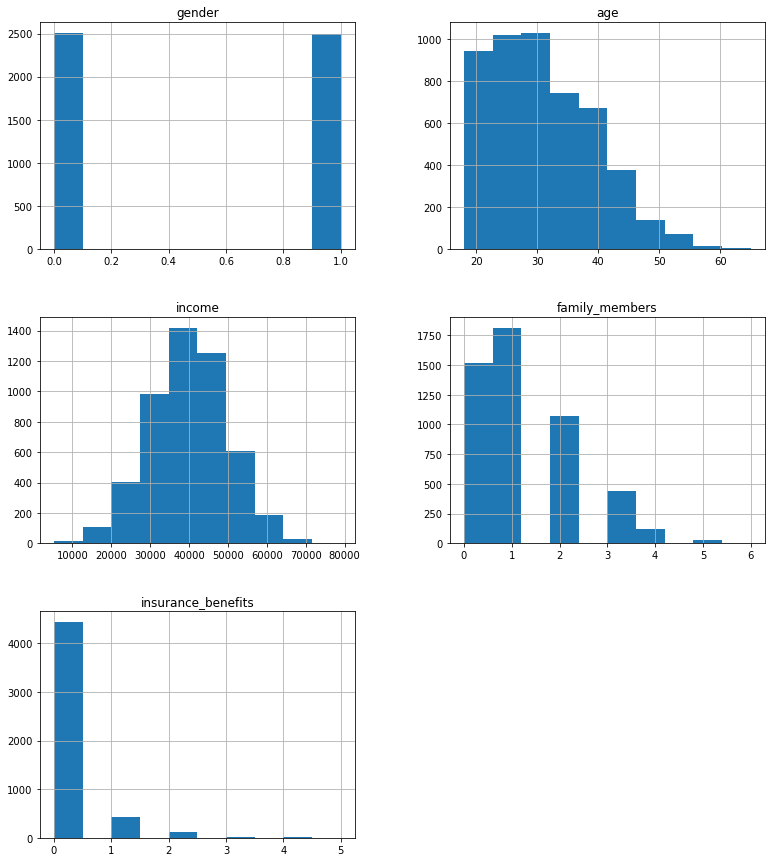

In [10]:
insurance_data.hist(figsize=(13, 15));

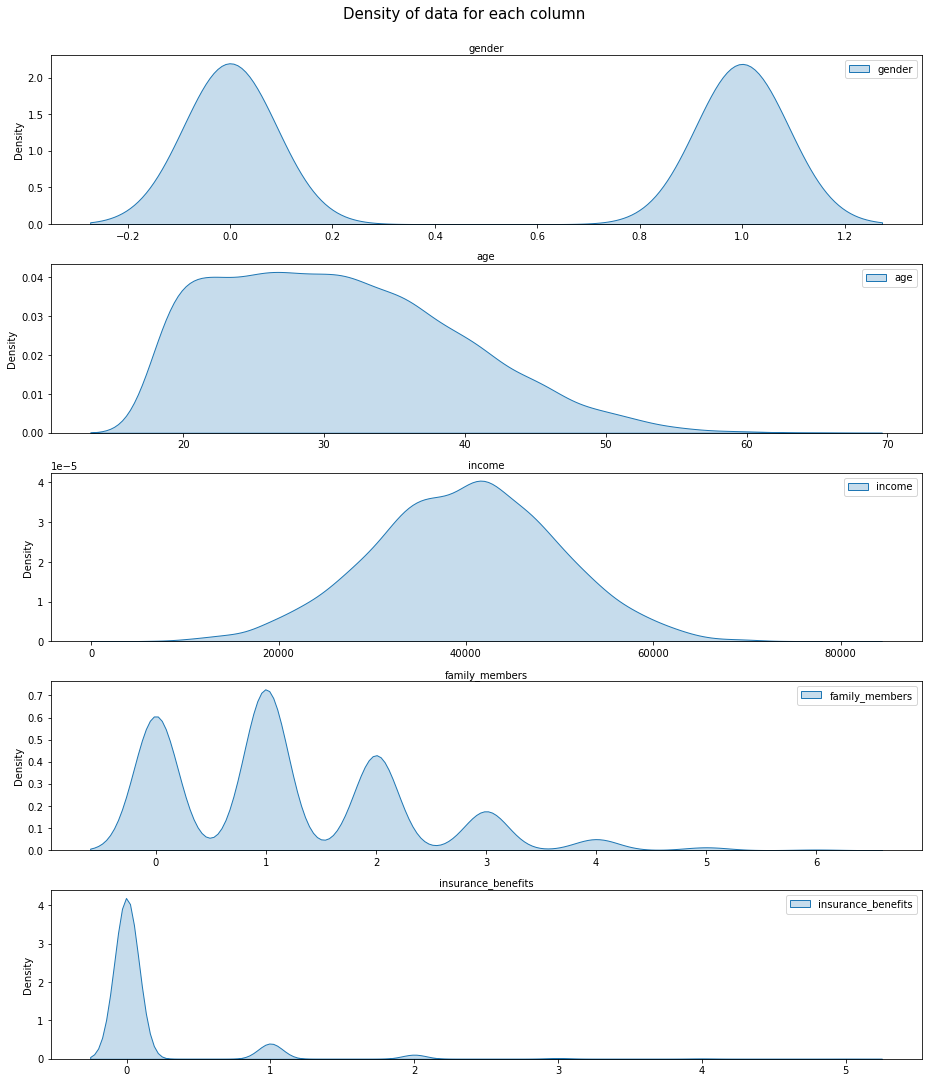

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(13, 15), sharey=False)
fig.suptitle('Density of data for each column', fontsize=15, y=1)

for c in range(insurance_data.columns.shape[0]):
    sns.kdeplot(insurance_data[insurance_data.columns[c]], ax=axes[c], shade='fill', label=insurance_data.columns[c])
    axes[c].legend()
    axes[c].xaxis.set_label_position('top')

plt.tight_layout()
plt.show()

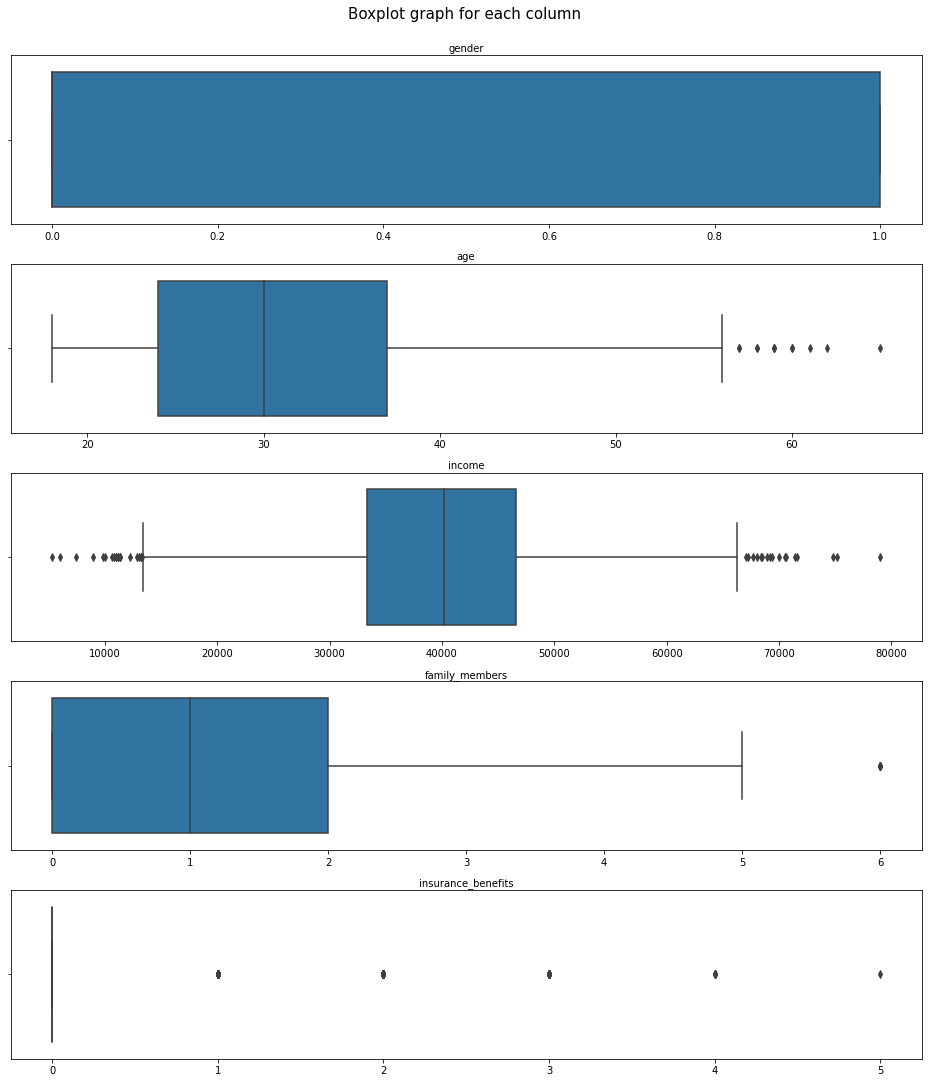

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(13, 15), sharey=False)
fig.suptitle('Boxplot graph for each column', fontsize=15, y=1)

for c in range(insurance_data.columns.shape[0]):
    sns.boxplot(insurance_data[insurance_data.columns[c]], ax=axes[c])
    axes[c].xaxis.set_label_position('top')

plt.tight_layout()
plt.show()

1.3 Notes: **We see that the data seems to be in order**. There are no null values. We see some outliers in the boxplots but looking manually through the data there doesn't seem to be outliers (the maximum age 65 is reasonable even if it's Q+/-1.5*IQR away from the the median.) There are 153 duplicated rows but looking at them, it's entirely possible that there are legitimate.

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

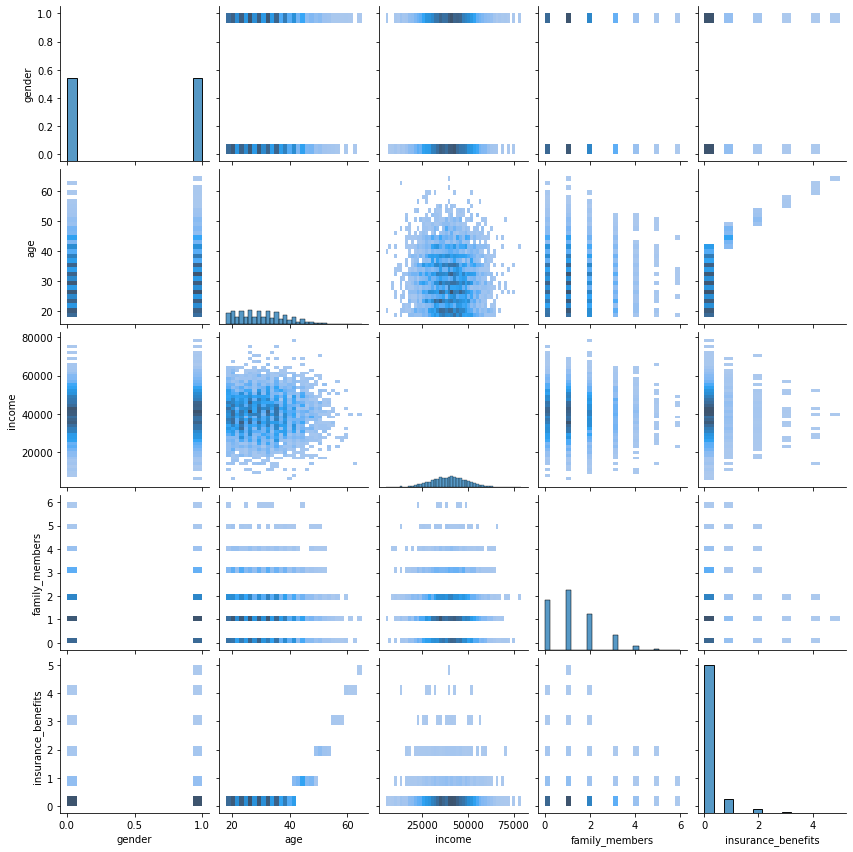

In [13]:
g = sns.pairplot(insurance_data, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

In [14]:
insurance_data.corr()

,gender,age,income,family_members,insurance_benefits
gender,1.000000,0.002074,0.014910,-0.008991,0.010140
age,0.002074,1.000000,-0.019093,-0.006692,0.651030
income,0.014910,-0.019093,1.000000,-0.030296,-0.014963
family_members,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
insurance_benefits,0.010140,0.651030,-0.014963,-0.036290,1.000000


We see that by far the Age best correlates with receiving insurance benefits.

##    Task 1: Similar customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task.

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [15]:
insurance_data.reset_index(drop=True,inplace=True)


#Function for calculating Euclidian Distance between two vectors
def euclidian_distance(x, y):
    return np.dot(x - y, x - y) ** 0.5

def manhattan_distance(x, y):
    return sum(abs(x - y))

#translates a customer from dictionary format to vector format
def dict_to_vect(dict):
    return np.array(list(dict.values())).reshape(1,-1)


#Calculating the distance from the vector to the rest of the dataset.
#This function returns two datasets containing only  the index and distance. One based on The Euclidian Distance and the other on Manhattan Distance.
def data_vector_distance(data, vector):
    temp_data = pd.DataFrame(index=data.index)
    temp_data['euclid_distance']=np.nan
    temp_data['manhat_distance']=np.nan
    for i in range(len(data)):
        temp_data.loc[i, 'euclid_distance'] = euclidian_distance(data.loc[i, 'gender':'insurance_benefits'], vector[0])
        temp_data.loc[i, 'manhat_distance'] = manhattan_distance(data.loc[i,'gender':'insurance_benefits'], vector[0])
    return temp_data


#This function returns the whole dataset.
def full_data_vector_distance(data, vector):
    data['euclid_distance']=np.nan
    data['manhat_distance']=np.nan
    for i in range(len(data)):
        data.loc[i, 'euclid_distance'] = euclidian_distance(data.loc[i, 'gender':'insurance_benefits'], vector[0])
        data.loc[i, 'manhat_distance'] = manhattan_distance(data.loc[i, 'gender':'insurance_benefits'], vector[0])
    data.sort_values('euclid_distance', axis=0, ascending=True, inplace=True)
    return data

def customer_distance_scaled(data, scaled_data, customer_dict, quantity, scaler):
    #scaling the customer vector with the same scaler used for the rest of the dataset
    customer_scaled_vector=scaler.transform(dict_to_vect(customer_dict))
    #retrieving the required number of neighbors based on the distance to our customer
    scaled_data_to_return=data_vector_distance(scaled_data,customer_scaled_vector)
    #translating the scaled data back to human-readable based on the index
    return data.loc[scaled_data_to_return.sort_values('euclid_distance', axis=0, ascending=True).head(quantity).index,],\
            data.loc[scaled_data_to_return.sort_values('manhat_distance', axis=0, ascending=True).head(quantity).index,]

def customer_distance_unscaled(data, customer_dict, quantity):
    #retrieving the neighbors based on the distance to our customer
    data_to_return=full_data_vector_distance(data,dict_to_vect(customer_dict))
    return data_to_return.sort_values('euclid_distance', axis=0, ascending=True).head(quantity),\
            data_to_return.sort_values('manhat_distance', axis=0, ascending=True).head(quantity)



To which customer we want to find neighbors?

In [16]:
customer = {
    'Gender': 1,
    'Age': 30,
    'Salary': 30000,
    'Family members': 1,
    'Insurance benefits': 0
}

In [17]:
customer2 = {
    'Gender': 1,
    'Age': 60,
    'Salary': 35000,
    'Family members': 1,
    'Insurance benefits': 0
}

In [18]:
customer3 = {
    'Gender': 1,
    'Age': 60,
    'Salary': 30000,
    'Family members': 1,
    'Insurance benefits': 0
}

### Unscaled Data

In [19]:
print('Showing neighbors of customer', customer)
eu_dist,man_dist=customer_distance_unscaled(insurance_data,customer,8)
print('============= Unscaled sorted by Euclidian Distance ==============')
display(eu_dist.T)
print('============= Unscaled sorted by Manhattan Distance ==============')
display(man_dist.T)

Showing neighbors of customer {'Gender': 1, 'Age': 30, 'Salary': 30000, 'Family members': 1, 'Insurance benefits': 0}
============= Unscaled sorted by Euclidian Distance ==============


,4034,3933,3158,2946,1283,3142,1138,2111
gender,0.000000,1.0,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
age,29.000000,27.0,27.000000,26.0,26.000000,26.000000,25.000000,25.000000
income,30000.000000,30000.0,30000.000000,30000.0,30000.000000,30000.000000,30000.000000,30000.000000
family_members,0.000000,1.0,3.000000,1.0,1.000000,0.000000,0.000000,3.000000
insurance_benefits,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
euclid_distance,1.732051,3.0,3.605551,4.0,4.123106,4.242641,5.196152,5.477226
manhat_distance,3.000000,3.0,5.000000,4.0,5.000000,6.000000,7.000000,8.000000


============= Unscaled sorted by Manhattan Distance ==============


,4034,3933,2946,3158,1283,4635,3142,1138
gender,0.000000,1.0,1.0,1.000000,0.000000,1.0,0.000000,0.000000
age,29.000000,27.0,26.0,27.000000,26.000000,24.0,26.000000,25.000000
income,30000.000000,30000.0,30000.0,30000.000000,30000.000000,30000.0,30000.000000,30000.000000
family_members,0.000000,1.0,1.0,3.000000,1.000000,1.0,0.000000,0.000000
insurance_benefits,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
euclid_distance,1.732051,3.0,4.0,3.605551,4.123106,6.0,4.242641,5.196152
manhat_distance,3.000000,3.0,4.0,5.000000,5.000000,6.0,6.000000,7.000000


### Scaled Data

In [20]:
insurance_data.drop(['euclid_distance','manhat_distance'],axis=1,inplace=True)

In [21]:
insurance_scaler = MaxAbsScaler()
insurance_data_scaled = pd.DataFrame(insurance_scaler.fit_transform(insurance_data.copy()), columns=insurance_data.columns)

In [22]:
print('Showing neighbors of customer', customer)
eu_dist, man_dist = customer_distance_scaled(insurance_data, insurance_data_scaled, customer, 8, insurance_scaler)
print('============= Scaled sorted by Euclidian Distance ==============')
display(eu_dist.T)
print('============= Scaled sorted by Manhattan Distance ==============')
display(man_dist.T)

Showing neighbors of customer {'Gender': 1, 'Age': 30, 'Salary': 30000, 'Family members': 1, 'Insurance benefits': 0}
============= Scaled sorted by Euclidian Distance ==============


,143,102,196,197,356,355,430,479
gender,0,1,0,0,1,0,1,1
age,40,43,18,45,30,45,20,41
income,54600,27300,39800,16600,31600,35700,28700,43200
family_members,1,0,4,2,3,2,0,1
insurance_benefits,0,1,0,1,0,1,0,0


============= Scaled sorted by Manhattan Distance ==============


,143,102,196,197,572,18,355,356
gender,0,1,0,0,1,1,0,1
age,40,43,18,45,43,42,45,30
income,54600,27300,39800,16600,29600,49700,35700,31600
family_members,1,0,4,2,0,0,2,3
insurance_benefits,0,1,0,1,1,1,1,0


In [23]:
neigh = NearestNeighbors(n_neighbors=8)
neigh.fit(insurance_data)
neigh.kneighbors(dict_to_vect(customer))

(array([[1.73205081, 3.        , 3.60555128, 4.        , 4.12310563,
         4.24264069, 5.19615242, 5.47722558]]),
 array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int64))

We see that scikit-learn.NearestNeighbors also gives the same result as I did, as it returns the first 8 indexes from our ordered dataset.

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?**

Since the data is not scaled, the salary has a lot more weight than all other features. A negligible variance of 1000 in salary has equal weight to having 1000 kids. Of course this makes no sense. We need to normalize the data in order to find similar customers.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?**
Very similar in the unscaled dataset, slightly different in the scaled dataset.

# Task 2. Is Customer Likely to Receive Insurance Benefit?

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influence the evaluation metric, and whether scaling the data makes any difference. You can use a ready implementation of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

First with the original data

In [24]:
insurance_data.reset_index(drop=True,inplace=True)
rand_gen=np.random.default_rng()
target = (insurance_data['insurance_benefits'] > 0) * 1
features = insurance_data.drop('insurance_benefits', axis=1)

In [25]:
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.3,random_state=12345)

In [26]:
original_scores=[]
for i in range(1,11):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(features_train, target_train)
    y_pred=classifier.predict(features_test)
    original_scores.append(f1_score(target_test,y_pred))

Now with scaled data

In [27]:
features_train_scaled = insurance_scaler.fit_transform(features_train)
features_test_scaled = insurance_scaler.transform(features_test)

In [28]:
scaled_scores=[]
for i in range(1,11):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(features_train_scaled, target_train)
    y_pred=classifier.predict(features_test_scaled)
    scaled_scores.append(f1_score(target_test,y_pred))

Now we implement the dummy models

In [29]:
zero_scores=[f1_score(target_test,[0]*len(target_test))]*10
one_scores=[f1_score(target_test,[1]*len(target_test))]*10
half_scores= [f1_score(target_test, np.random.randint(2, size=len(target_test)))] * 10

#we generate a number of random indexes which will be considered as part of the target class
random_indexes=rand_gen.integers(0,len(target_test),size=sum(target_test))
prob_test=[0]*len(target_test)
for i in random_indexes:
    prob_test[i]=1
prob_scores= [f1_score(target_test, prob_test)] * 10

In [30]:
knn_results=pd.DataFrame(data=[original_scores, scaled_scores, zero_scores, one_scores, half_scores, prob_scores],index=['original_scores', 'scaled_scores', 'zero_scores', 'one_scores', 'half_scores', 'prob_scores'])
knn_results.T

,original_scores,scaled_scores,zero_scores,one_scores,half_scores,prob_scores
0,0.609319,0.937500,0.0,0.197115,0.180645,0.107256
1,0.336538,0.903010,0.0,0.197115,0.180645,0.107256
2,0.357143,0.936709,0.0,0.197115,0.180645,0.107256
3,0.233503,0.878378,0.0,0.197115,0.180645,0.107256
4,0.250000,0.912052,0.0,0.197115,0.180645,0.107256
5,0.080925,0.865979,0.0,0.197115,0.180645,0.107256
6,0.102857,0.900000,0.0,0.197115,0.180645,0.107256
7,0.047619,0.872852,0.0,0.197115,0.180645,0.107256
8,0.070175,0.896321,0.0,0.197115,0.180645,0.107256
9,0.024096,0.876712,0.0,0.197115,0.180645,0.107256


Let's see graphically how the models score

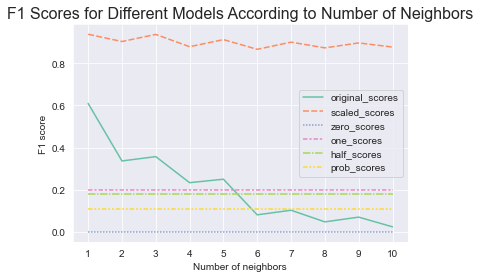

In [31]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(data=knn_results.T)
sns.set(rc={"figure.figsize":(16, 8)}) #width=8, height=4
plt.title('F1 Scores for Different Models According to Number of Neighbors',fontdict = {'fontsize' : 16})
plt.ylabel('F1 score')
plt.xlabel('Number of neighbors')
plt.xticks([i for i in range(len(knn_results.T))],[i for i in range(1,len(knn_results.T)+1)])
plt.show()

We see that the scaled model mantains a pretty high score, even though it has a descending trend. The model on the original data decreases in quality very fast. The dummy models which don't take into account the number of neighbors have a constant low score.

### Conclusion
Our model has a much better score than a random model.

## Predict the number of insurance benefits a new customer is likely to receive using a Linear Regression model.

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [32]:
class MyLinearRegression:

    def __init__(self):

        self.weights = None

    def fit(self, X, y):

        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)

    def predict(self, X):

        # adding the unities
        X2 = X.dot(self.weights[1:])
        y_pred = X2+self.weights[0]

        return y_pred

In [33]:
def eval_regressor(y_true, y_pred):

    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.5f}')

    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.5f}')

In [34]:
X = insurance_data_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = insurance_data_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-1.86612141e-01  4.59762464e-01  1.08918304e-03 -2.45950091e-04
 -1.80755844e-02]
RMSE: 0.07431
R2: 0.63871


Let's compare the model we made with the sklearn Linear Regression implementation

Using original data

In [35]:
target = insurance_data['insurance_benefits']
features = insurance_data.drop('insurance_benefits', axis=1)

In [36]:
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.3,random_state=12345)

In [37]:
model=LinearRegression()
model.fit(features_train,target_train)
predicted_values=model.predict(features_test)

Using scaled data

In [38]:
features_train_scaled=insurance_scaler.fit_transform(features_train)
features_test_scaled=insurance_scaler.transform(features_test)

We scale the data only after splitting it so we don't get leakage

In [39]:
model.fit(features_train_scaled,target_train)
predicted_values_scaled=model.predict(features_test_scaled)

Checking Mean Squared Error of our model

In [40]:
print(f'========== Unscaled Data ==============')
print(f'The Root Mean Squared Error of our model is {math.sqrt(mean_squared_error(target_test,predicted_values)):.5f}')
print(f'The R2 Score of our model is {math.sqrt(sklearn.metrics.r2_score(target_test,predicted_values)):.5f}')
print(f'========== Scaled Data ==============')
print(f'The Root Mean Squared Error of our model is {math.sqrt(mean_squared_error(target_test,predicted_values_scaled)):.5f}')
print(f'The R2 Score of our model is {math.sqrt(sklearn.metrics.r2_score(target_test,predicted_values_scaled)):.5f}')

========== Unscaled Data ==============
The Root Mean Squared Error of our model is 0.37154
The R2 Score of our model is 0.63871
========== Scaled Data ==============
The Root Mean Squared Error of our model is 0.37154
The R2 Score of our model is 0.63871


Incredible. We get the exact same score 😁

## Task 4. Obfuscating Data

We can protect the client's personal information by obfuscating the data. An easy way to do this is by multiplying the data on our end with a random matrix and sending to the destination the inverse of our random matrix with which to obtain the original data back.

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$.

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [41]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
insurance_data_personal_info = insurance_data[personal_info_column_list]

In [42]:
X = insurance_data_personal_info.to_numpy()

Checking the matrix $P$ is invertible

A matrix is invertible if the determinant doesn't equal 0

In [43]:
# Function to get cofactor of # mat[p][q] in temp[][]. n is # current dimension of mat[][]
def getCofactor(mat, temp, p, q, n):
    i = 0
    j = 0
    # Looping for each element of the matrix
    for row in range(n):
        for col in range(n):
            # Copying into temporary matrix only those element which are not in given row and column
            if (row != p and col != q) :
                temp[i][j] = mat[row][col]
                j += 1
                # Row is filled, so increase row index and reset col index
                if (j == n - 1):
                    j = 0
                    i += 1

# Recursive function for finding determinant of matrix. n is current dimension of mat[][].
def determinant_matrix(mat, n):
    D = 0 # Initialize result
    # Base case : if matrix contains single element
    if (n == 1):
        return mat[0][0]
    # To store cofactors
    temp = [[0 for x in range(n)]
            for y in range(n)]
    sign = 1 # To store sign multiplier
    # Iterate for each element of first row
    for f in range(n):
        # Getting Cofactor of mat[0][f]
        getCofactor(mat, temp, 0, f, n)
        D += (sign * mat[0][f] *
              determinant_matrix(temp, n - 1))
        # terms are to be added with alternate sign
        sign = -sign
    return D


Generating a random matrix $P$. In case it's not invertible, we do it again.

In [44]:
generate_matrix=True
while (generate_matrix):
    rng = np.random.default_rng(seed=42)
    P = rng.random(size=(X.shape[1], X.shape[1]))
    #if the determinant of the matrix is close to 0 (in pure math it must be 0 but here we might have rounding errors)
    generate_matrix=np.isclose(determinant_matrix(P,P.shape[0]),0)


Can you guess the customers' ages or income after the transformation?

In [45]:
personal_info_transformed=insurance_data_personal_info.dot(P)
display(personal_info_transformed.T)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,3846.140123,3847.369590,3848.657320,3847.275412,3846.501456,3845.857591,3845.763414,3847.695009,3847.087058,3845.669237,...,8870.192786,8895.967953,8972.652939,9037.493927,9048.421743,9150.535940,9177.425860,9586.216469,9637.441384,10126.899939
1,13539.871185,13539.181580,13540.827104,13538.205958,13537.767080,13536.944318,13535.968696,13538.436980,13536.254713,13534.993073,...,31208.121920,31301.509857,31556.417480,31801.428618,31826.954764,32183.361025,32282.449837,33715.648837,33903.169312,35622.574012
2,11146.013778,11145.793511,11146.680339,11145.032371,11144.173773,11143.730359,11142.969220,11144.299462,11143.510092,11142.208080,...,25692.049742,25768.077583,25978.919034,26180.176291,26202.033300,26495.627160,26575.904113,27757.101582,27910.651312,29325.996068
3,27825.745530,27825.098008,27825.552486,27824.311944,27823.614576,27823.387337,27822.601273,27823.282989,27822.739816,27821.815209,...,64165.849297,64353.090359,64896.710865,65376.932297,65453.887510,66192.155244,66383.553865,69343.942270,69720.239412,73247.814601


Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

$$
X' = X \times P $$
$$X'\times P^{-1} = X \times P \times P^{-1} $$
$$X'\times P^{-1} = X \times I = X
$$
So by multiplying the transformed data with the inverse of the P we obtain the original matrix with original data.

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [46]:
P_inversed=np.linalg.inv(P)
resulting_data=np.dot(insurance_data[personal_info_column_list],P)
recovered_data=np.dot(resulting_data,P_inversed)

In [47]:
#Display best scores from all regressors.
comparison = pd.DataFrame(columns=personal_info_column_list,index=['Original','Obfuscated','Recovered'])

for i in np.random.randint(0,len(insurance_data_personal_info),5):
    print (f'Index {i}:')
    comparison.loc['Original'] = insurance_data_personal_info.reset_index(drop=True).loc[i,].values
    comparison.loc['Obfuscated'] =resulting_data[i]
    comparison.loc['Recovered'] =recovered_data[i]
    display(comparison)

Index 4282:


,gender,age,income,family_members
Original,0,30,50400,1
Obfuscated,6460.396272,22729.542702,18711.498027,46732.764606
Recovered,-0.0,30.0,50400.0,1.0


Index 3225:


,gender,age,income,family_members
Original,0,21,43800,3
Obfuscated,5615.286431,19749.860434,16258.267638,40609.495578
Recovered,0.0,21.0,43800.0,3.0


Index 4367:


,gender,age,income,family_members
Original,1,19,51100,2
Obfuscated,6550.457686,23035.342653,18963.986119,47373.777997
Recovered,1.0,19.0,51100.0,2.0


Index 1532:


,gender,age,income,family_members
Original,1,49,36300,2
Obfuscated,4657.201242,16398.899443,13499.009551,33681.238092
Recovered,1.0,49.0,36300.0,2.0


Index 846:


,gender,age,income,family_members
Original,1,58,26500,0
Obfuscated,3401.247508,11992.252329,9871.152343,24605.561302
Recovered,1.0,58.0,26500.0,-0.0


You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

**Answer** While in pure math the results are identical, limitations of calculating using floating point means that there will be floating point errors. But by rounding the results we obtain the original data.

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above?

What would be predicted values with $w_P$?

What does that mean for the quality of linear regression if you measure it with RMSE?

**Answers**
$$w = Pw_p$$
$$\hat{y_P} = \hat{y}$$
The quality of linear regression remains the same.


**Analytical proof**

 $$ w_P = [(XP)^T XP]^{-1} (XP)^T y $$
$$        = [P^TX^TXP]^{-1}(P^TX^T) y $$
$$            =P^{-1}(X*X^T)^{-1}(P^T)^{-1}P^TX^Ty$$
$$            =P^{-1}(X*X^T)^{-1}IX^Ty$$
$$            =P^{-1}\big[(X*X^T)^{-1}X^Ty\big]$$
$$            (X*X^T)^{-1}X^Ty=w \quad \Rightarrow \quad $$
$$            w_P=P^{-1}w$$


$$\hat{y} = Xw $$
$$\hat{y_P} = XPw_P = XP\big (P^{-1}w \big ) = Xw = \hat{y}$$


$$ RMSE_p = \sqrt{\Sigma_{i=1}^{n}{\Big(\frac{\hat{y_{iP}} -y_i}{n}\Big)^2}} $$
$$ RMSE = \sqrt{\Sigma_{i=1}^{n}{\Big(\frac{\hat{y_i} -y_i}{n}\Big)^2}} $$

Since $\hat y_P = \hat y$ then $RMSE_P = RMSE$

## Test Linear Regression With Data Obfuscation

In [48]:
obf_features_train = features_train.dot(P)
obf_features_test = features_test.dot(P)

In [49]:
model.fit(obf_features_train,target_train)
obf_predicted_values=model.predict(obf_features_test)


Checking Mean Squared Error of both our models

In [50]:
print(f'The Root Mean Squared Error of our model is {math.sqrt(mean_squared_error(target_test,predicted_values)):.5f}')
print(f'The R2 Score of the original model is {math.sqrt(sklearn.metrics.r2_score(target_test,predicted_values)):.5f}')

print(f'The Root Mean Squared Error of our model is {math.sqrt(mean_squared_error(target_test,obf_predicted_values)):.5f}')
print(f'The R2 Score of the obfuscated model is {math.sqrt(sklearn.metrics.r2_score(target_test,obf_predicted_values)):.5f}')

The Root Mean Squared Error of our model is 0.37154
The R2 Score of the original model is 0.63871
The Root Mean Squared Error of our model is 0.37154
The R2 Score of the obfuscated model is 0.63871


Incredible. With a completely different (obfuscated) matrix using **the same model** we got the exact same score 😁

# Conclusion<a class="anchor" id='4'></a>
We have opened and analyzed the dataset.
We scaled the dataset using the MaxAbs Scaler. We wrote an implementation of the k Nearest Neighbor algorithm to find customers similar to a given customer. We have applied it with two different distance formulas, both on the given dataset and on the scaled one.
We created a Machine Learning model to predict whether a new customer is likely to receive an insurance benefit with very good results.
We made a linear regression model to predict the number of insurance benefits a new customer is likely to receive.
We used a random matrix to obfuscate the personal data of the clients in order to protect it from unauthorized access, without breaking the model from the previous task. We proved the method works both analytically and in practice.